# Friedmann ligningen

I denne notebook vil der regnes på friedman ligningen for en model af et univers der består af stof, stråling og mørk energi, med krumning. Modellen bygger på Friedmann ligning der kan skrives som 
\begin{align}
    H^2=H_0^2\left(\frac{\Omega _R}{a^4}0\frac{\Omega_M}{a^3}+\Omega_{\Lambda}+\frac{1-\Omega_0}{a^2}\right),
\end{align}
hvor $a$ er skala faktoren, $H\equiv\frac{\dot{a}}{a}$, $H_0$ er Hubble konstanten, $\Omega_R$ er strålings densiteten delt med den kritiske densitet, $\Omega_M$ og $\Omega_{\Lambda}$ er ligeledes stof og mørk energi densiteterne delt med den kritiske densitet, og den sidste konstant $\Omega_0=\Omega_r+\Omega_M+\Omega_{\Lambda}$ er et mål for universets krumning, hvor $\Omega_0=1$ svarer til et fladt univers, $\Omega>1$ svarer til univers med positiv krumning og $\Omega_{\Lambda}<1$ svare til et univers med negativ krumning. Det vil blibe brugt værdier for $\Omega_{\Lambda}$ og $\Omega_M$ fra "Planck 2015, p. 32, table 4, last column", og $\Omega_R=9.0\cdot 10^{-5}$ fra bogen Introduction to Cosmology 2nd edition, af Barbara Ryden, Cambridge University Press, 2017. 

Den kosmiske tid, $t$, kan findes som funktion af $a$ ved at beregne integralet
\begin{align}
    \int_{0}^{a}\frac{da}{\sqrt{\Omega_R/a^2+\Omega_M/a+\Omega_{\Lambda}a^2+(1-\Omega_0)}}=H_0t
\end{align}
Formålet med dette skript er at løse ovenstående integral numerisk.

Der benyttes følgende biblioteker

In [1]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np

Dernæst definere vi funktionen som vi vil integrere

In [2]:
def f(a):
    Omega = R + L + M
    return (R/a**2+M/a+L*a**2+(1-Omega))**(-1/2)

Vi skal bruge nogle lister hvor de beregnede værdier kan lagres

In [3]:
a_maks=3     #Definere den maksimale værdi af a
N = 100      #Definere opløsningen på grafen
Lista = np.linspace(0,a_maks,num=N) #indeler a-aksen i 100 ligestore steps
Listt1 = np.linspace(0,0,num=N)     #indeler t-aksen, værdierne er ligemeget, da de bliver erstatet senere
Listt2 = np.linspace(0,0,num=N)     #Der skal være 3 forskellige Lister til t, da der laves plot af måde flat, og krumt univers.
Listt3 = np.linspace(0,0,num=N)


In [4]:
i = 1            #Index til loop
R = 9.0*10**(-5) #Strålings densitets parameter
L = 0.6911       #Stof densitets parameter
M = 0.3089       #Mørk energi densitets parameter
while i < N:     #Integrere funktionen optil a_maks
    Listt1[i] = quad(f, 0, Lista[i])[0]
    i += 1
print(quad(f, 0, 3)[1]) #Printer den estimerede usikkerhed på integrationen
i = 1
R = 9.0*10**(-5)
L = 0.6911+0.0124  #Variablerne igen, men nu den højste værdi som er understøttet 
M = 0.3089+0.0124  #af målinger inden for en usikkerhed på sigma 2
while i < N:
    Listt2[i] = quad(f, 0, Lista[i])[0]
    i += 1
print(quad(f, 0, 3)[1])
i = 1
R = 9.0*10**(-5)
L = 0.6911-0.0124 #Den mindste værdi der ligger indenfor sigma 2 af målingerne
M = 0.3089-0.0124
while i < N:
    Listt3[i] = quad(f, 0, Lista[i])[0]
    i += 1
print(quad(f, 0, 3)[1])

1.3048107908487669e-08
1.5572934596219502e-08
1.0796554659317028e-08


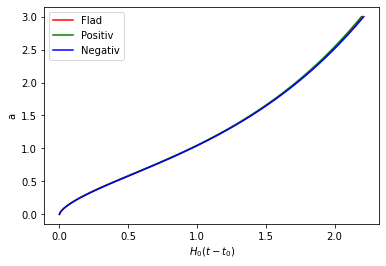

In [5]:
plt.plot(Listt1,Lista, color='r', label='Flad')
plt.plot(Listt2,Lista, color='g', label='Positiv')
plt.plot(Listt3,Lista, color='b', label='Negativ')

plt.xlabel('$H_0(t-t_0)$')
plt.ylabel('a')

plt.legend()

plt.show()

Nu laves samme plot igen, men for a op til 60

1.3048107908487669e-08
1.5572934596219502e-08
1.0796554659317028e-08


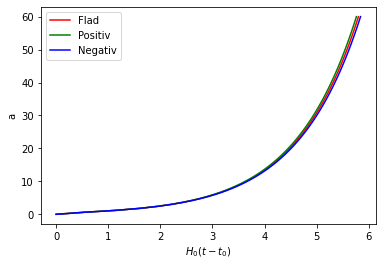

In [6]:
a_maks=60
N = 100
Lista = np.linspace(0,a_maks,num=N)
Listt1 = np.linspace(0,0,num=N)
Listt2 = np.linspace(0,0,num=N)
Listt3 = np.linspace(0,0,num=N)
i = 1
R = 9.0*10**(-5)
L = 0.6911
M = 0.3089
while i < N:
    Listt1[i] = quad(f, 0, Lista[i])[0]
    i += 1
print(quad(f, 0, 3)[1])
i = 1
R = 9.0*10**(-5)
L = 0.6911+0.0124
M = 0.3089+0.0124
while i < N:
    Listt2[i] = quad(f, 0, Lista[i])[0]
    i += 1
print(quad(f, 0, 3)[1])
i = 1
R = 9.0*10**(-5)
L = 0.6911-0.0124
M = 0.3089-0.0124
while i < N:
    Listt3[i] = quad(f, 0, Lista[i])[0]
    i += 1
print(quad(f, 0, 3)[1])
plt.plot(Listt1,Lista, color='r', label='Flad')
plt.plot(Listt2,Lista, color='g', label='Positiv')
plt.plot(Listt3,Lista, color='b', label='Negativ')

plt.xlabel('$H_0(t-t_0)$')
plt.ylabel('a')

plt.legend()

1.3048107908487669e-08
3.723466542026439e-10
1.6922974866021793e-09


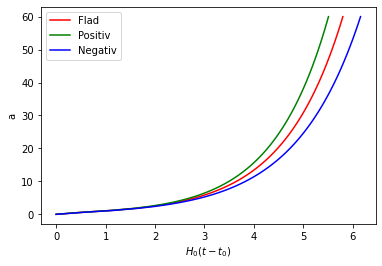

In [7]:
a_maks=60
N = 100
Lista = np.linspace(0,a_maks,num=N)
Listt1 = np.linspace(0,0,num=N)
Listt2 = np.linspace(0,0,num=N)
Listt3 = np.linspace(0,0,num=N)
i = 1
R = 9.0*10**(-5)
L = 0.6911
M = 0.3089
while i < N:
    Listt1[i] = quad(f, 0, Lista[i])[0]
    i += 1
print(quad(f, 0, 3)[1])
i = 1
R = 9.0*10**(-5)
L = 0.6911+0.1
M = 0.3089+0.1
while i < N:
    Listt2[i] = quad(f, 0, Lista[i])[0]
    i += 1
print(quad(f, 0, 3)[1])
i = 1
R = 9.0*10**(-5)
L = 0.6911-0.1
M = 0.3089-0.1
while i < N:
    Listt3[i] = quad(f, 0, Lista[i])[0]
    i += 1
print(quad(f, 0, 3)[1])
plt.plot(Listt1,Lista, color='r', label='Flad')
plt.plot(Listt2,Lista, color='g', label='Positiv')
plt.plot(Listt3,Lista, color='b', label='Negativ')

plt.xlabel('$H_0(t-t_0)$')
plt.ylabel('a')

plt.legend()

plt.show()